In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import make_regression
from keras.models import Sequential
from sklearn import preprocessing
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import math

In [2]:
TSLA = yf.download("TSLA")
TSLA.drop('Adj Close', axis = 1)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500
...,...,...,...,...,...
2022-05-27,723.250000,759.799988,720.530029,759.630005,29765000
2022-05-31,773.840027,778.799988,734.229980,758.260010,33971500
2022-06-01,755.159973,771.979980,730.919983,740.369995,25749300


In [3]:
# Data normalization
min_max_scaler = preprocessing.MinMaxScaler()
TSLAdf = min_max_scaler.fit_transform(TSLA)
df = pd.DataFrame(TSLAdf, columns=TSLA.columns)
x = df.drop('Close', axis = 1)
y = df['Close']
y = pd.DataFrame(y.values,columns=['Close'])

In [4]:
#建立訓練及測試資料
cut = 30
X_train, X_test = x.iloc[:-cut], x.iloc[-cut:]
y_train, y_test = y.iloc[:-cut], y.iloc[-cut:]
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [5]:
#建立BPN模型並訓練
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(16,input_dim=5))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='Adam')
model.fit(X_train, y_train, epochs = 500, batch_size = 256) #epochs模型訓練次數

Epoch 1/500
12/12 [==============================] - 0s 635us/step - loss: 0.2541
Epoch 2/500
12/12 [==============================] - 0s 544us/step - loss: 0.2092
Epoch 3/500
12/12 [==============================] - 0s 544us/step - loss: 0.1703
Epoch 4/500
12/12 [==============================] - 0s 544us/step - loss: 0.1375
Epoch 5/500
12/12 [==============================] - 0s 544us/step - loss: 0.1099
Epoch 6/500
12/12 [==============================] - 0s 544us/step - loss: 0.0868
Epoch 7/500
12/12 [==============================] - 0s 544us/step - loss: 0.0676
Epoch 8/500
12/12 [==============================] - 0s 544us/step - loss: 0.0519
Epoch 9/500
12/12 [==============================] - 0s 544us/step - loss: 0.0393
Epoch 10/500
12/12 [==============================] - 0s 544us/step - loss: 0.0292
Epoch 11/500
12/12 [==============================] - 0s 544us/step - loss: 0.0214
Epoch 12/500
12/12 [==============================] - 0s 453us/step - loss: 0.0155
Epoch 13/500


12/12 [==============================] - 0s 453us/step - loss: 5.5949e-05
Epoch 97/500
12/12 [==============================] - 0s 453us/step - loss: 5.5820e-05
Epoch 98/500
12/12 [==============================] - 0s 544us/step - loss: 5.5759e-05
Epoch 99/500
12/12 [==============================] - 0s 544us/step - loss: 5.5203e-05
Epoch 100/500
12/12 [==============================] - 0s 544us/step - loss: 5.5046e-05
Epoch 101/500
12/12 [==============================] - 0s 453us/step - loss: 5.4798e-05
Epoch 102/500
12/12 [==============================] - 0s 453us/step - loss: 5.4760e-05
Epoch 103/500
12/12 [==============================] - 0s 544us/step - loss: 5.4351e-05
Epoch 104/500
12/12 [==============================] - 0s 544us/step - loss: 5.4409e-05
Epoch 105/500
12/12 [==============================] - 0s 453us/step - loss: 5.4381e-05
Epoch 106/500
12/12 [==============================] - 0s 453us/step - loss: 5.4493e-05
Epoch 107/500
12/12 [============================

12/12 [==============================] - 0s 544us/step - loss: 4.0046e-05
Epoch 190/500
12/12 [==============================] - 0s 544us/step - loss: 4.0035e-05
Epoch 191/500
12/12 [==============================] - 0s 635us/step - loss: 3.9659e-05
Epoch 192/500
12/12 [==============================] - 0s 544us/step - loss: 3.9994e-05
Epoch 193/500
12/12 [==============================] - 0s 595us/step - loss: 3.9487e-05
Epoch 194/500
12/12 [==============================] - 0s 453us/step - loss: 4.0002e-05
Epoch 195/500
12/12 [==============================] - 0s 544us/step - loss: 3.9309e-05
Epoch 196/500
12/12 [==============================] - 0s 453us/step - loss: 3.9022e-05
Epoch 197/500
12/12 [==============================] - 0s 453us/step - loss: 3.8859e-05
Epoch 198/500
12/12 [==============================] - 0s 469us/step - loss: 3.8982e-05
Epoch 199/500
12/12 [==============================] - 0s 453us/step - loss: 3.8699e-05
Epoch 200/500
12/12 [=========================

12/12 [==============================] - 0s 544us/step - loss: 2.8802e-05
Epoch 283/500
12/12 [==============================] - 0s 544us/step - loss: 2.8780e-05
Epoch 284/500
12/12 [==============================] - 0s 453us/step - loss: 2.8588e-05
Epoch 285/500
12/12 [==============================] - 0s 544us/step - loss: 2.8824e-05
Epoch 286/500
12/12 [==============================] - 0s 544us/step - loss: 2.8530e-05
Epoch 287/500
12/12 [==============================] - 0s 544us/step - loss: 2.8228e-05
Epoch 288/500
12/12 [==============================] - 0s 544us/step - loss: 2.8227e-05
Epoch 289/500
12/12 [==============================] - 0s 544us/step - loss: 2.8260e-05
Epoch 290/500
12/12 [==============================] - 0s 544us/step - loss: 2.7764e-05
Epoch 291/500
12/12 [==============================] - 0s 544us/step - loss: 2.7710e-05
Epoch 292/500
12/12 [==============================] - 0s 544us/step - loss: 2.8086e-05
Epoch 293/500
12/12 [=========================

12/12 [==============================] - 0s 544us/step - loss: 1.8858e-05
Epoch 376/500
12/12 [==============================] - 0s 635us/step - loss: 1.8815e-05
Epoch 377/500
12/12 [==============================] - 0s 544us/step - loss: 1.8997e-05
Epoch 378/500
12/12 [==============================] - 0s 544us/step - loss: 1.8831e-05
Epoch 379/500
12/12 [==============================] - 0s 544us/step - loss: 1.8459e-05
Epoch 380/500
12/12 [==============================] - 0s 635us/step - loss: 1.8510e-05
Epoch 381/500
12/12 [==============================] - 0s 508us/step - loss: 1.8345e-05
Epoch 382/500
12/12 [==============================] - 0s 544us/step - loss: 1.8211e-05
Epoch 383/500
12/12 [==============================] - 0s 544us/step - loss: 1.8054e-05
Epoch 384/500
12/12 [==============================] - 0s 544us/step - loss: 1.8503e-05
Epoch 385/500
12/12 [==============================] - 0s 544us/step - loss: 1.8384e-05
Epoch 386/500
12/12 [=========================

12/12 [==============================] - 0s 453us/step - loss: 1.1582e-05
Epoch 469/500
12/12 [==============================] - 0s 453us/step - loss: 1.1357e-05
Epoch 470/500
12/12 [==============================] - 0s 453us/step - loss: 1.1826e-05
Epoch 471/500
12/12 [==============================] - 0s 453us/step - loss: 1.1460e-05
Epoch 472/500
12/12 [==============================] - 0s 453us/step - loss: 1.1269e-05
Epoch 473/500
12/12 [==============================] - 0s 453us/step - loss: 1.1410e-05
Epoch 474/500
12/12 [==============================] - 0s 544us/step - loss: 1.1506e-05
Epoch 475/500
12/12 [==============================] - 0s 544us/step - loss: 1.1560e-05
Epoch 476/500
12/12 [==============================] - 0s 544us/step - loss: 1.1271e-05
Epoch 477/500
12/12 [==============================] - 0s 544us/step - loss: 1.0940e-05
Epoch 478/500
12/12 [==============================] - 0s 544us/step - loss: 1.0714e-05
Epoch 479/500
12/12 [=========================

In [6]:
#模型描述
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                96        
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Train Data')

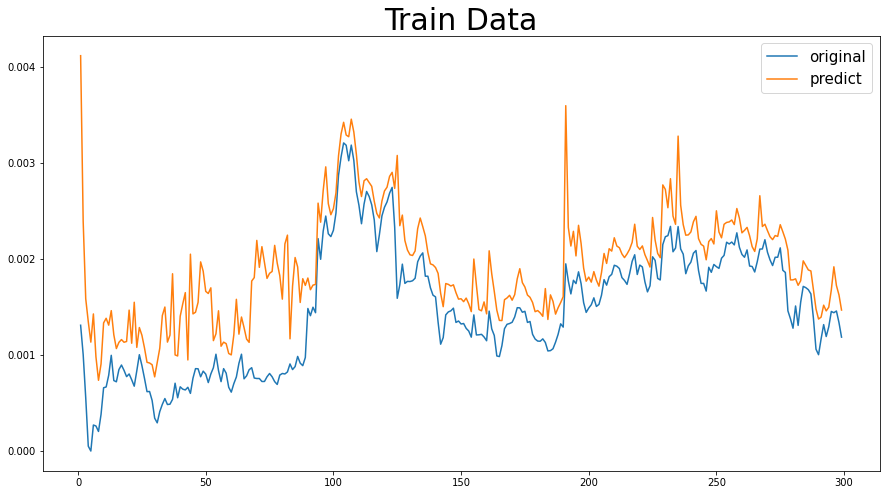

In [7]:
#模型用於訓練集上結果
start = 1
end = 300
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
draw = pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[start:end,0].plot(figsize=(15,8))
draw.iloc[start:end,1].plot(figsize=(15,8))
plt.legend(('original', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30')

Text(0.5, 1.0, 'Test Data')

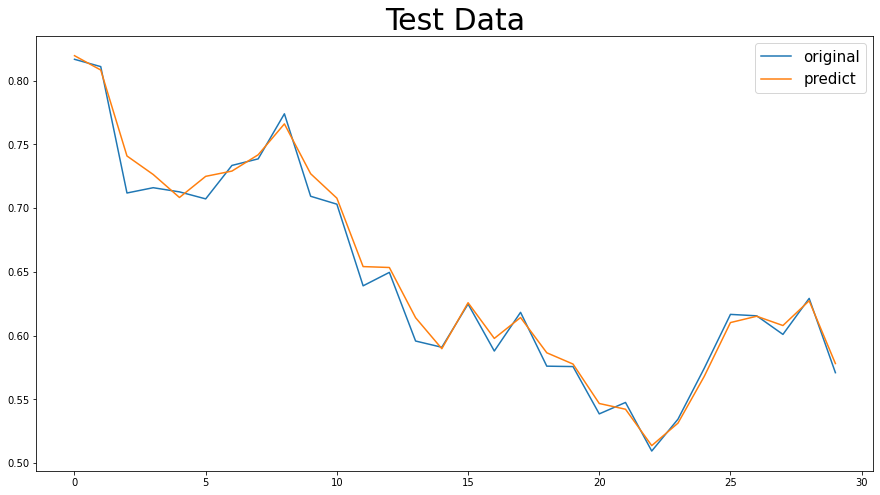

In [8]:
#模型用於測試集上結果
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(15,8))
draw.iloc[:,1].plot(figsize=(15,8))
plt.legend(('original', 'predict'), fontsize='15', loc='upper right')
plt.title("Test Data",fontsize='30')

In [9]:
#输出结果
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print(' Train Data MAE:', mean_absolute_error(y_train_predict, y_train), '\n', 'Train Data MSE:', mean_squared_error(y_train_predict, y_train), '\n', 'Train Data MAPE:', MAPE(y_train_predict, y_train))
print(' ======================================')
print(' Test Data MAE:', mean_absolute_error(y_test_predict, y_test), '\n', 'Test Data MSE:', mean_squared_error(y_test_predict, y_test), '\n', 'Test Data MAPE:', MAPE(y_test_predict, y_test))
print(' ======================================')
print(' 預測收盤價格正確率:', result)

 Train Data MAE: 0.001469832597938067 
 Train Data MSE: 9.6219977510915e-06 
 Train Data MAPE: 1411.7386956953626
 Test Data MAE: 0.007353263195494556 
 Test Data MSE: 9.461704562549854e-05 
 Test Data MAPE: 14.371437680132823
 預測收盤價格正確率: 0.8275862068965517


In [10]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=2, noise=0.1)
# fit final model
regressor = LinearRegression()
regressor.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=30, n_features=2, noise=0.1, random_state=1)
# make a prediction
ynew = regressor.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
    print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[0.04221375 0.58281521], Predicted=37.74538752124991
X=[ 0.90085595 -0.68372786], Predicted=-5.394078174184497
X=[-0.67124613 -0.0126646 ], Predicted=-28.24270711880536
X=[-0.69166075 -0.39675353], Predicted=-52.81343283760807
X=[-0.20889423  0.58662319], Predicted=27.707309078707897
X=[1.65980218 0.74204416], Predicted=113.76447711665486
X=[-0.74715829  1.6924546 ], Predicted=74.0226871591506
X=[ 1.46210794 -2.06014071], Predicted=-67.49007041197967
X=[-0.17242821 -0.87785842], Predicted=-61.30125192541748
X=[0.28558733 0.88514116], Predicted=66.38517125443023
X=[ 1.13376944 -1.09989127], Predicted=-21.58267783860332
X=[-1.1425182  -0.34934272], Predicted=-68.32919629185959
X=[-0.3224172  -0.38405435], Predicted=-36.92206789034777
X=[0.12015895 0.61720311], Predicted=43.05936997597367
X=[-1.11731035  0.2344157 ], Predicted=-31.223406794560002
X=[ 0.3190391  -0.24937038], Predicted=-2.3555721209369382
X=[0.19091548 2.10025514], Predicted=137.60224502134105
X=[-0.52817175 -1.07296862]